In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model

In [2]:
# Set board size for nxn Queeen problem.
board_size = 4

In [3]:
# Define a solver
model = cp_model.CpModel()

In [4]:
# Define  the variables. The array index represents the column, and the value is the row.
queens = [model.NewIntVar(0, board_size - 1, 'x%i' % i) for i in range(board_size)]

In [5]:
# Define the constraints

# All rows must be different.
model.AddAllDifferent(queens)

# No two queens can be on the same diagonal.
model.AddAllDifferent(queens[i] + i for i in range(board_size))
model.AddAllDifferent(queens[i] - i for i in range(board_size))

In [6]:
# Solve the model.
solver = cp_model.CpSolver()
solver.parameters.enumerate_all_solutions = True
solver.Solve(model)

4

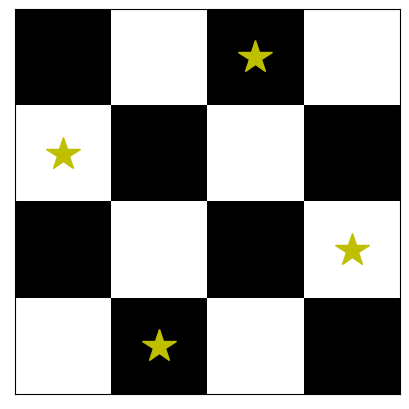

In [7]:
# Visualizae the solution
all_queens = range(board_size)
state=[]
for i in all_queens:
    for j in all_queens:
        if solver.Value(queens[j]) == i:
            # There is a queen in column j, row i.
            state.append(True)
        else:
            state.append(None)     
            
states=np.array(state).reshape(-1, board_size)
fig = plt.figure(figsize=(5,5))
# # Convert 2D board to 1D marker list
markers = [
    x.tolist().index(True) if True in x.tolist() else None
    for x in np.transpose(states)
]
res = np.add.outer(range(board_size), range(board_size)) % 2
plt.imshow(res, cmap="binary_r")
plt.xticks([])
plt.yticks([])
plt.plot(markers, marker="*", linestyle="None", markersize=100/board_size, color="y")
# plt.savefig('CH02_F09_OR_Tools.png', format='png', dpi=300)